In [2]:
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import plotly as px
import seaborn as sns

In [3]:
df = pd.read_csv(r"C:/Users/logan/Downloads/Copper_Set.xlsx - Result 1.csv")
df.head()

# reading csv file via dataframe

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [4]:
df.shape

(181673, 14)

In [5]:
df.isna().sum()      # checking no.of.null values

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [6]:
df.isna().sum()      # checking no.of.null values

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [7]:
for i in df.columns:
  print(i,":",df[i].nunique())        # fetching no.of unique values in each col

id : 181671
item_date : 252
quantity tons : 181673
customer : 1169
country : 17
status : 9
item type : 7
application : 30
thickness : 594
width : 1386
material_ref : 16563
product_ref : 33
delivery date : 28
selling_price : 9795


In [8]:
df.info()   # ensuring the data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


## Handling irrelavant data types

In [9]:
df['item_date'] = pd.to_datetime(df['item_date'], format='%Y%m%d', errors='coerce').dt.date
df['quantity tons'] = pd.to_numeric(df['quantity tons'], errors='coerce')
df['customer'] = pd.to_numeric(df['customer'], errors='coerce')
df['country'] = pd.to_numeric(df['country'], errors='coerce')
df['application'] = pd.to_numeric(df['application'], errors='coerce')
df['width'] = pd.to_numeric(df['width'], errors='coerce')
df['delivery date'] = pd.to_datetime(df['delivery date'], format='%Y%m%d', errors='coerce').dt.date

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181670 non-null  object 
 2   quantity tons  181672 non-null  float64
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181670 non-null  object 
 13  selling_price  181672 non-null  float64
dtypes: float64(7), int64(1), object(6)
memory usage: 19.4+ MB


In [11]:
#removing the "00000" datas in the "material_ref" column
df["material_ref"]=df["material_ref"].apply(lambda x: np.nan if str(x).startswith("00000") else x)

In [12]:
# handling missing values in material_ref by replacing unknown
df['material_ref'].fillna('unknown', inplace=True)

In [13]:
df.isna().sum()

id                2
item_date         3
quantity tons     1
customer          1
country          28
status            2
item type         0
application      24
thickness         1
width             0
material_ref      0
product_ref       0
delivery date     3
selling_price     1
dtype: int64

In [14]:
# handling missing values using central tendancy
#numarical column and median() , mode()
df["item_date"]. fillna(df["item_date"].mode().iloc[0],inplace=True)
df["quantity tons"].fillna(df["quantity tons"].median(),inplace=True)
df["customer"].fillna(df["customer"].median(),inplace=True)
df["country"].fillna(df["country"].median(),inplace=True)
df["application"].fillna(df["application"].median(),inplace=True)
df["thickness"].fillna(df["thickness"].median(),inplace=True)
df["selling_price"].fillna(df["selling_price"].median(),inplace=True)
df["status"].fillna(df["status"].mode().iloc[0],inplace=True)
df["delivery date"]. fillna(df["delivery date"].mode().iloc[0],inplace=True)

df = df.dropna()

In [15]:
df.isna().sum()

id               0
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
quantity tons,181671.0,5.874958e+03,2.349088e+06,-2000.00,1.097022e+01,3.036499e+01,6.716084e+01,1.000000e+09
customer,181671.0,3.051221e+07,2.433388e+07,12458.00,3.019688e+07,3.020524e+07,3.028042e+07,2.147484e+09
country,181671.0,4.489092e+01,2.440310e+01,25.00,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
application,181671.0,2.561431e+01,1.775331e+01,2.00,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
thickness,181671.0,2.564830e+00,6.572338e+00,0.18,7.000000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,181671.0,1.295290e+03,2.616311e+02,1.00,1.180000e+03,1.250000e+03,1.500000e+03,2.990000e+03
product_ref,181671.0,4.739731e+08,7.175123e+08,611728.00,6.119930e+05,6.406650e+05,1.332077e+09,1.722208e+09
selling_price,181671.0,1.918041e+03,3.317966e+05,-1160.00,6.690000e+02,8.120000e+02,9.530000e+02,1.000010e+08


In [17]:
#converting the negative values into the null values
df["quantity tons"]= df["quantity tons"].apply(lambda x: np.nan if x<=0 else x)
df["selling_price"]= df["selling_price"].apply(lambda x: np.nan if x<=0 else x)

In [18]:
df["quantity tons"].fillna(df["quantity tons"].median(),inplace=True)
df["selling_price"].fillna(df["selling_price"].median(),inplace=True)

In [19]:
df.isna().sum()

id               0
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [20]:
# detecting the skewed columns using plot

def skewplot(df, column):
    plt.figure(figsize=(20, 4))

    # Distplot
    plt.subplot(1, 3, 1)
    sns.distplot(df[column], kde=True)
    plt.title("Distplot for " + column)

    # Boxplot
    plt.subplot(1, 3, 2)
    sns.boxplot(df[column])
    plt.title("Box plot for " + column)

    # Violin plot
    plt.subplot(1, 3, 3)
    sns.violinplot(df[column])
    plt.title("Violin plot for " + column)

    plt.tight_layout()
    plt.show()

In [21]:
skewed_columns=['quantity tons', 'customer', 'country',
               'application', 'thickness', 'width',
                'selling_price']

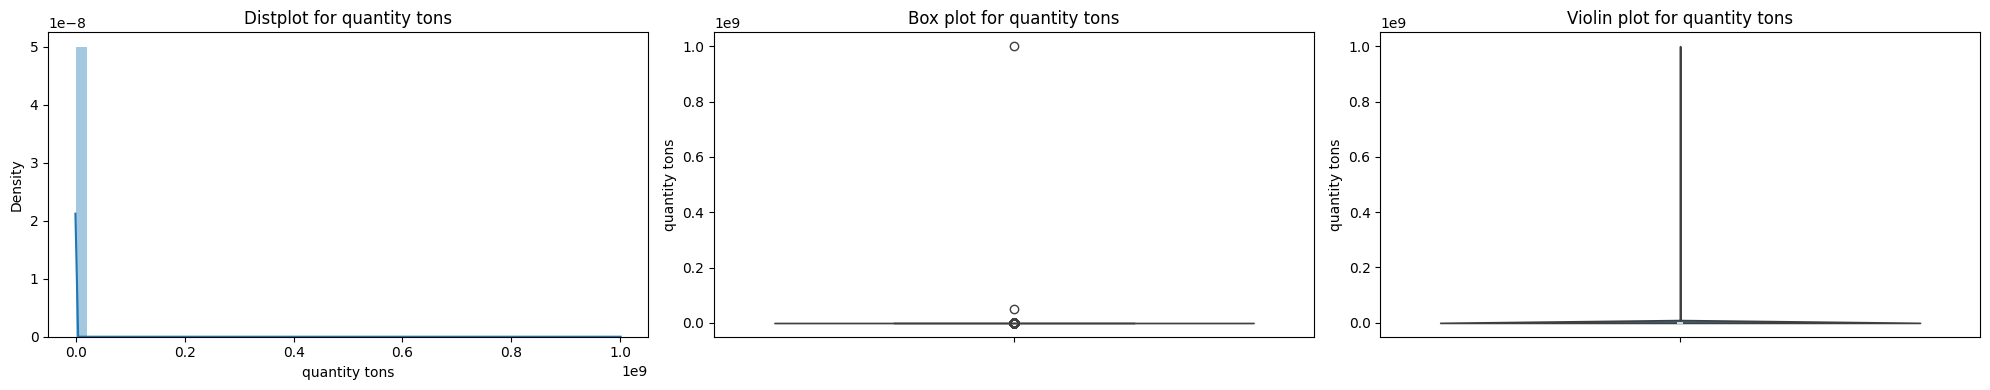

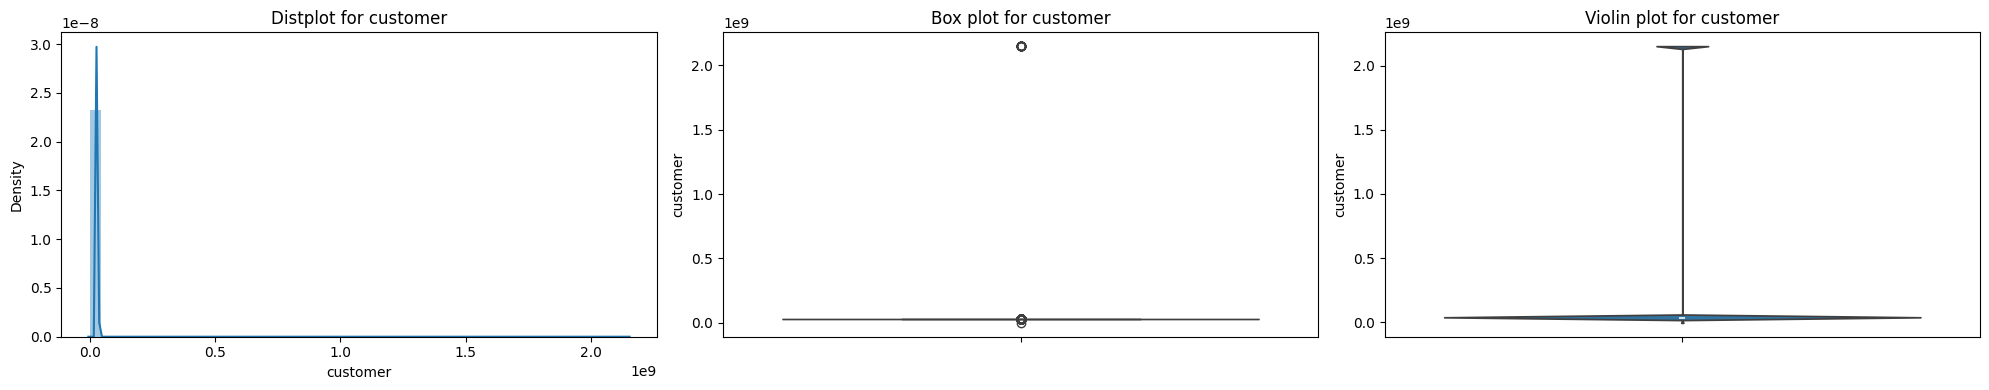

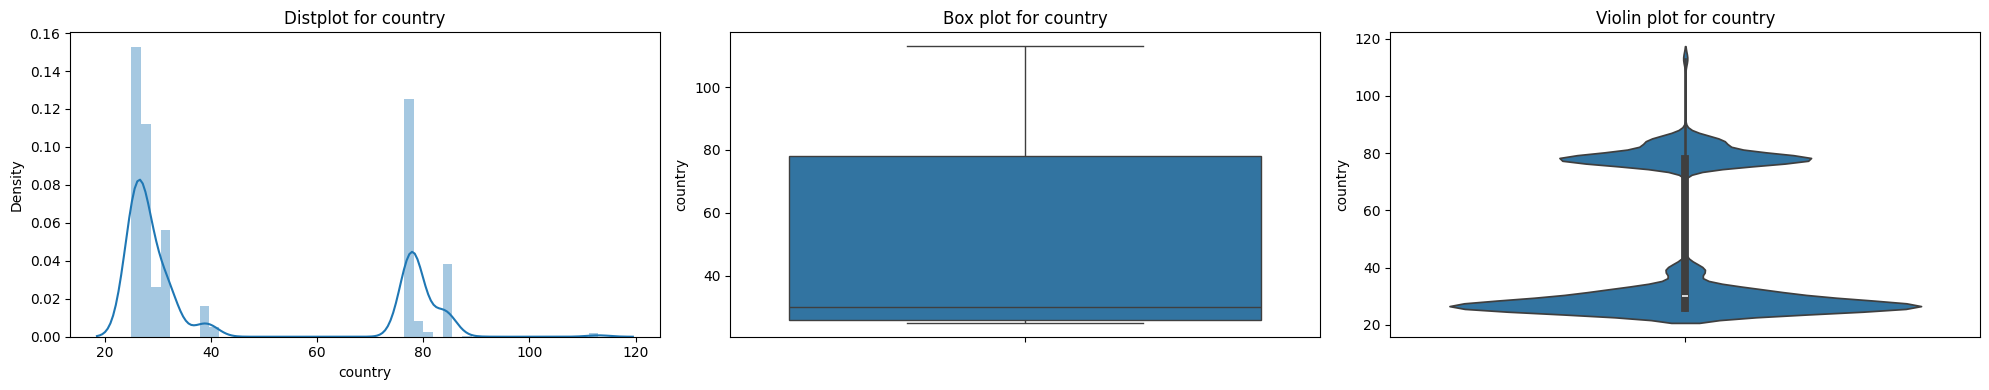

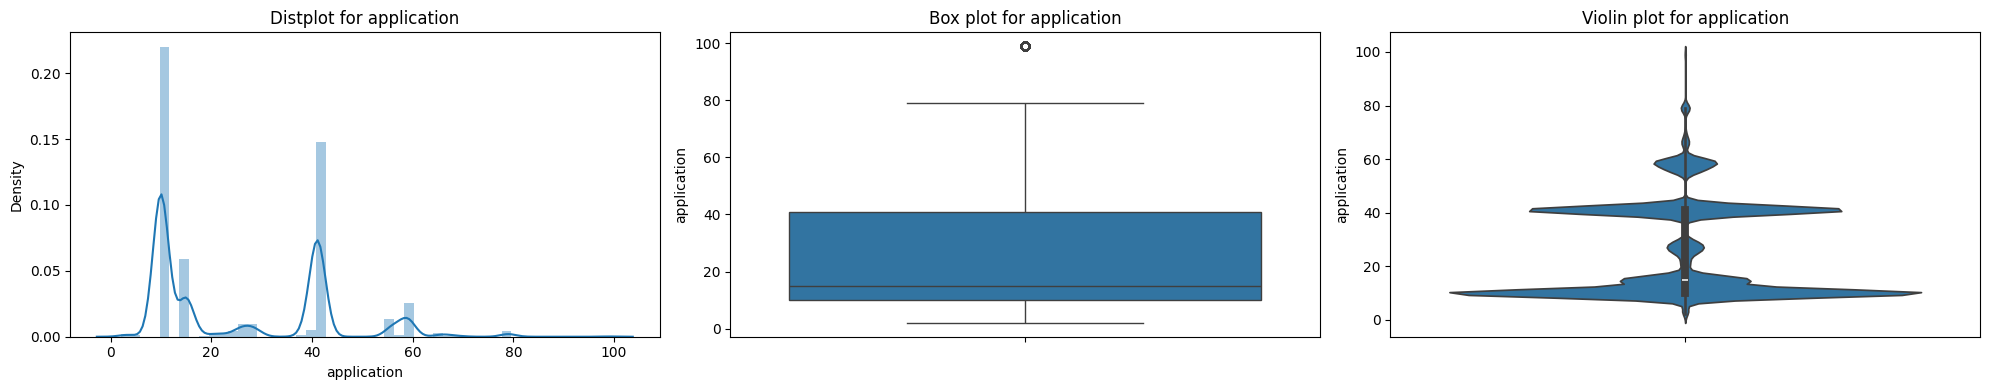

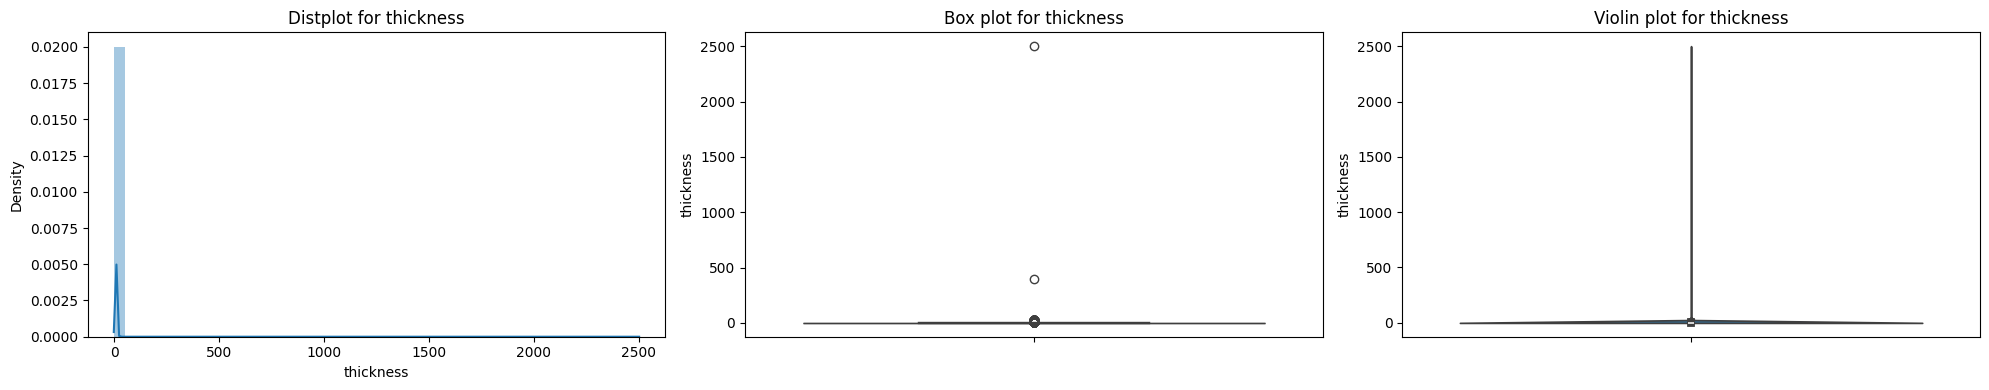

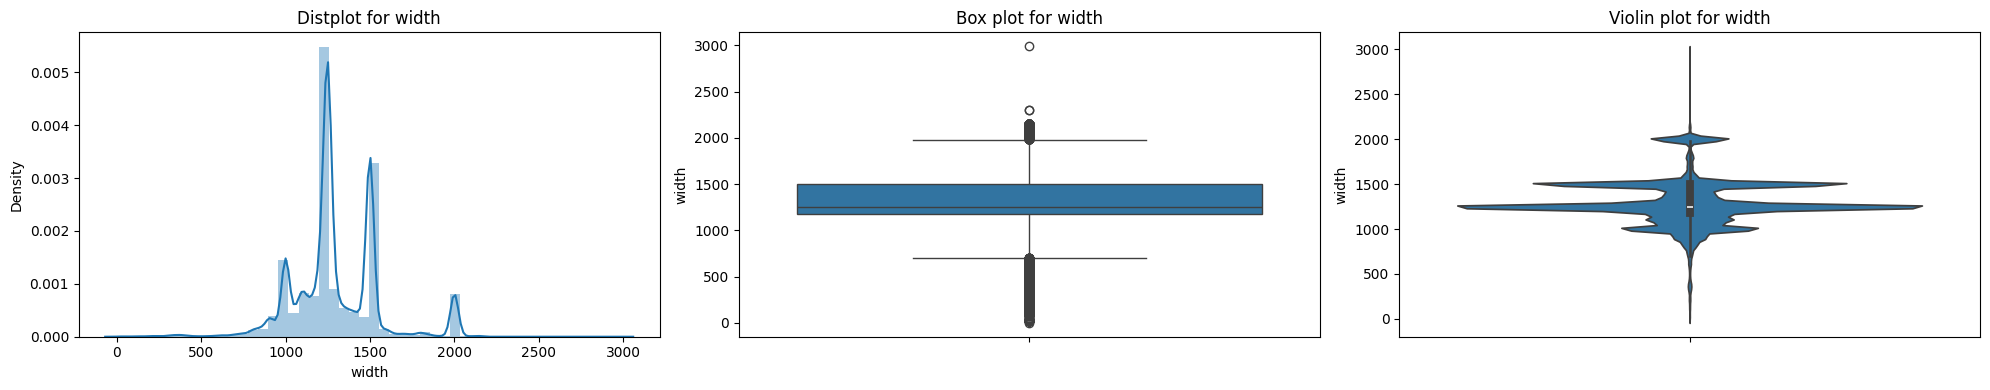

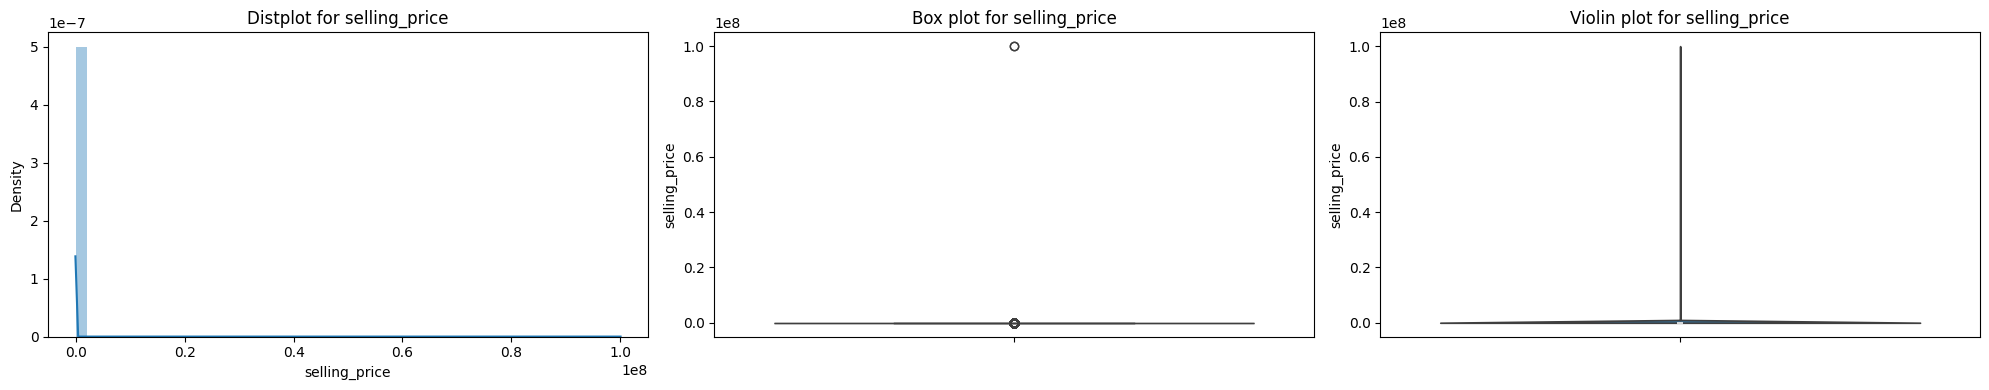

In [22]:
for i in skewed_columns:
  skewplot(df,i)

In [23]:
#Skewed columns:
# 1.quantity tons
# 2.width
# 3.thickness
# 4.selling_price

In [24]:
df1= df.copy()


df1.columns

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price'],
      dtype='object')

In [25]:
import numpy as np

def apply_log(column):
    # Log transformation requires positive values, so shift the data if necessary
    shift = 0
    if (df1[column] <= 0).any():
        shift = abs(df1[column].min()) + 1

    transformed_data = np.log(df1[column] + shift)
    return transformed_data, shift

# Apply log transformation
df1['quantity_tons_log'], quantity_tons_shift = apply_log('quantity tons')
df1['width_log'], width_shift = apply_log('width')
df1['thickness_log'], thickness_shift = apply_log('thickness')
df1['selling_price_log'], selling_price_shift = apply_log('selling_price')

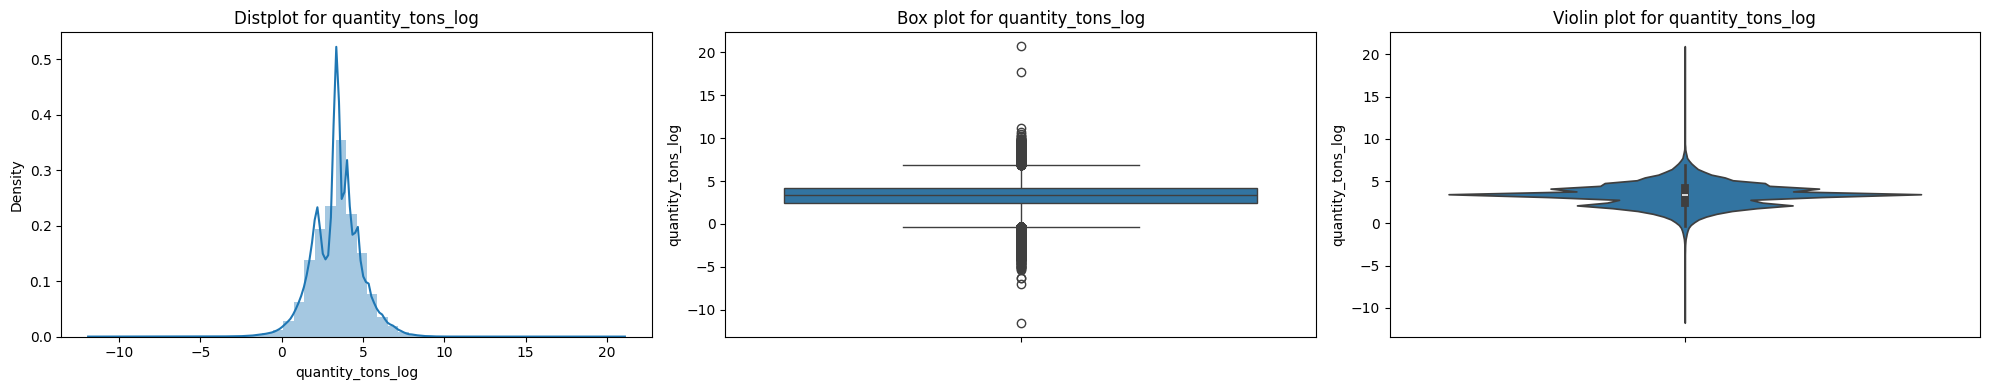

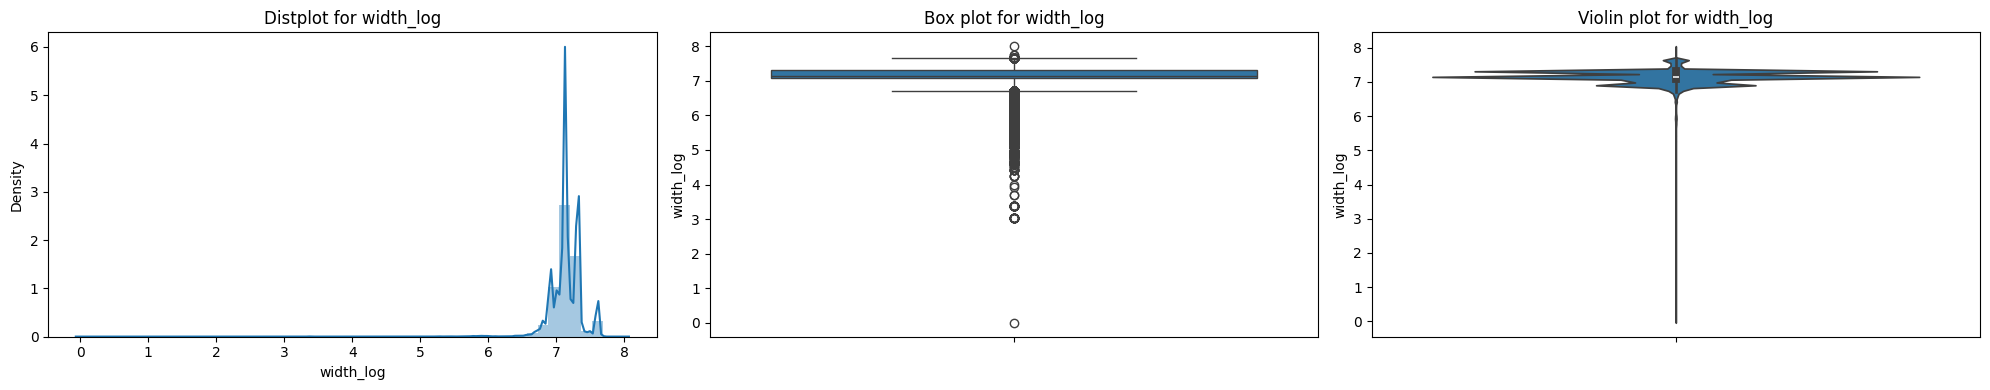

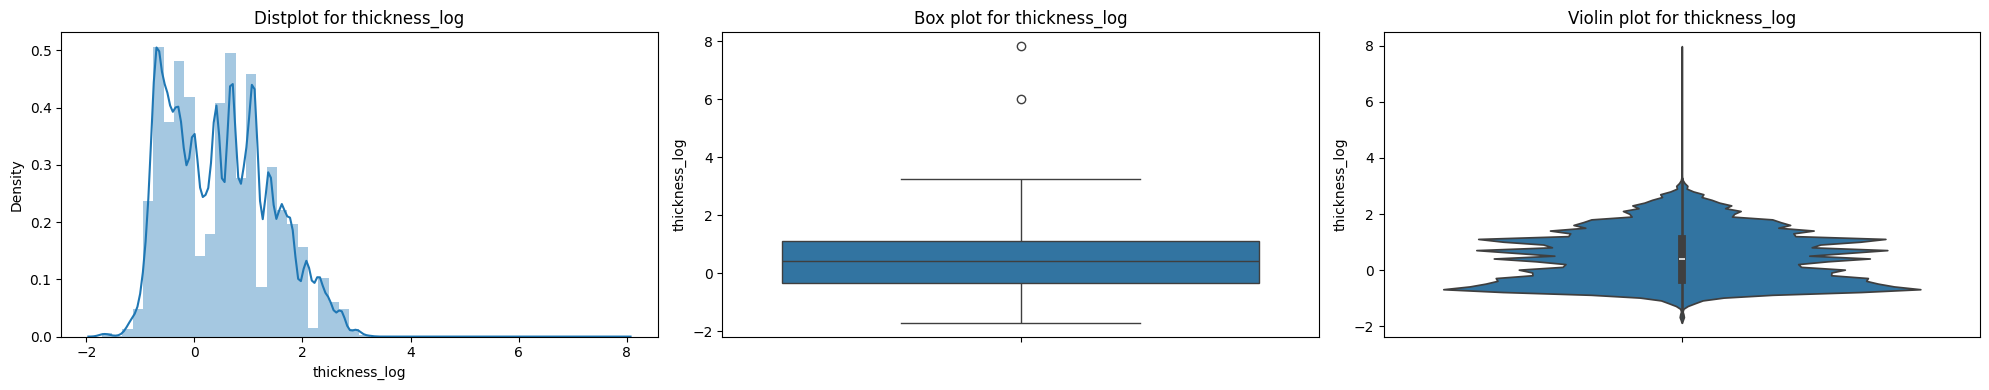

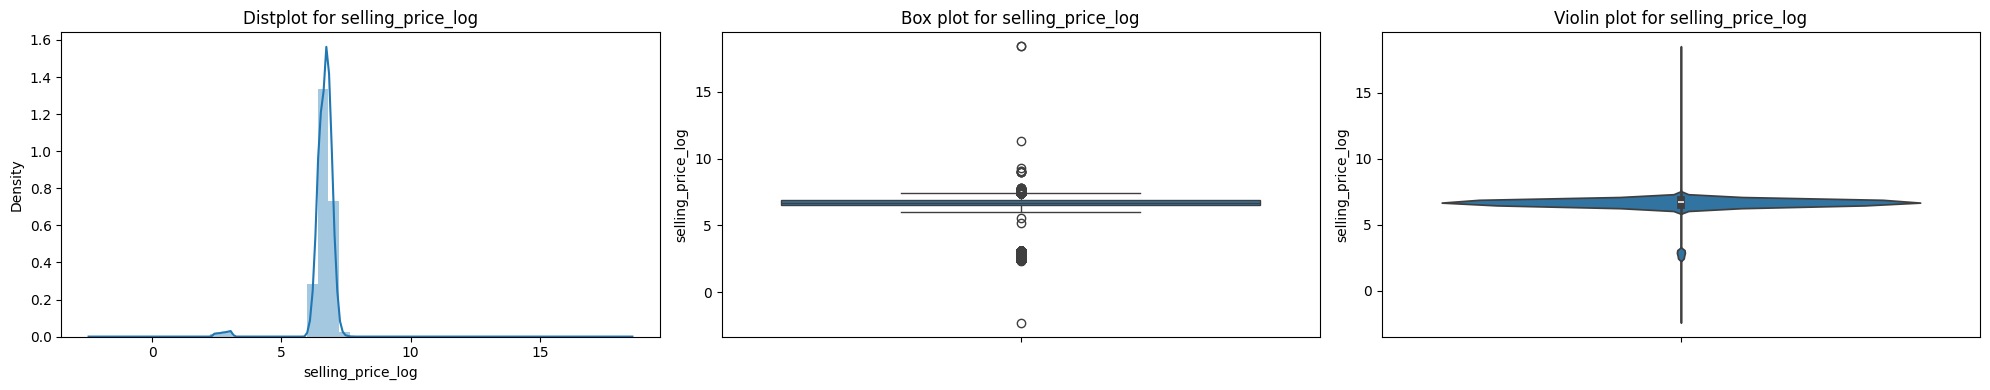

In [26]:
skwed_columns_2=["quantity_tons_log","width_log","thickness_log","selling_price_log"]
for i in skwed_columns_2:
  skewplot(df1,i)

In [27]:
# Outliers Handling - Interquartile Range(IQR) Method

df2= df1.copy()

df2.head(1)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,quantity_tons_log,width_log,thickness_log,selling_price_log
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.0,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.0,3.991779,7.31322,0.693147,6.749931


In [28]:
def outliers(df,column):
  q1= df[column].quantile(0.25)
  q3= df[column].quantile(0.75)

  iqr= q3-q1

  upper_threshold= q3 + (1.5*iqr)
  lower_threshold= q1 - (1.5*iqr)

  df[column]= df[column].clip(lower_threshold, upper_threshold)

In [29]:
outlier_columns= ['quantity_tons_log', 'width_log', 'thickness_log','selling_price_log','application']
for i in outlier_columns:
  outliers(df2,i)

In [30]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
quantity tons,181671.0,5.874970e+03,2.349088e+06,0.000010,1.097153e+01,3.036502e+01,6.716084e+01,1.000000e+09
customer,181671.0,3.051221e+07,2.433388e+07,12458.000000,3.019688e+07,3.020524e+07,3.028042e+07,2.147484e+09
country,181671.0,4.489092e+01,2.440310e+01,25.000000,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
application,181671.0,2.560507e+01,1.771806e+01,2.000000,1.000000e+01,1.500000e+01,4.100000e+01,8.750000e+01
thickness,181671.0,2.564830e+00,6.572338e+00,0.180000,7.000000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,181671.0,1.295290e+03,2.616311e+02,1.000000,1.180000e+03,1.250000e+03,1.500000e+03,2.990000e+03
product_ref,181671.0,4.739731e+08,7.175123e+08,611728.000000,6.119930e+05,6.406650e+05,1.332077e+09,1.722208e+09
selling_price,181671.0,1.918087e+03,3.317966e+05,0.100000,6.690000e+02,8.120000e+02,9.530000e+02,1.000010e+08
quantity_tons_log,181671.0,3.392953e+00,1.394631e+00,-0.322377,2.395303e+00,3.413291e+00,4.207090e+00,6.924771e+00
width_log,181671.0,7.152737e+00,1.858690e-01,6.713344,7.073270e+00,7.130899e+00,7.313220e+00,7.673146e+00


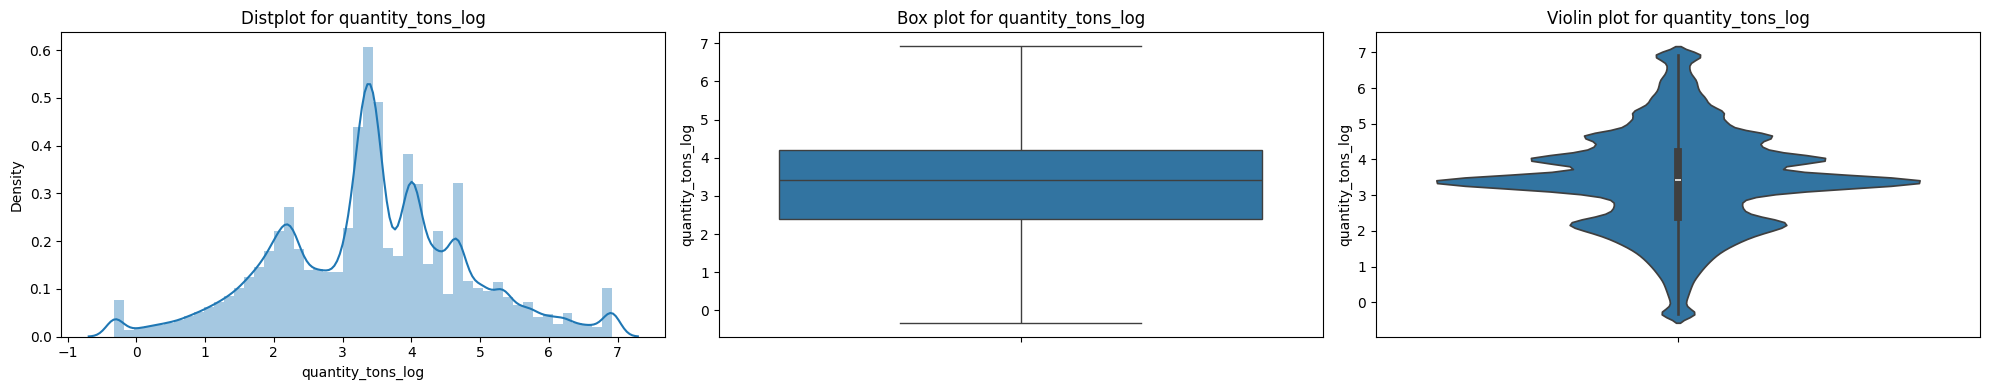

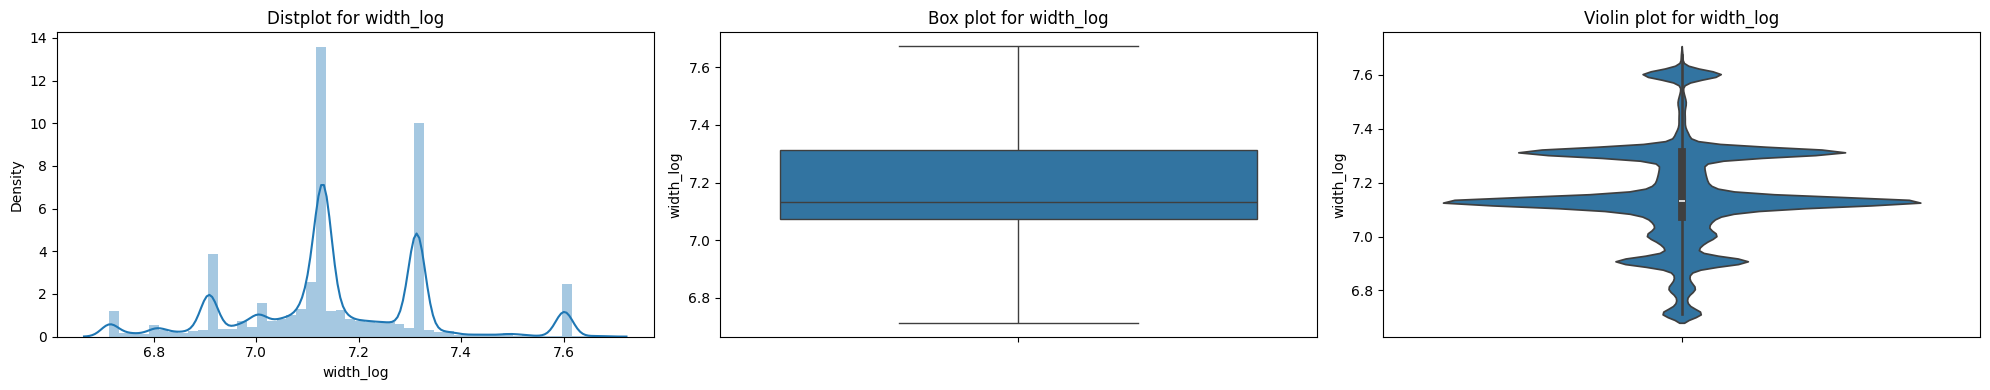

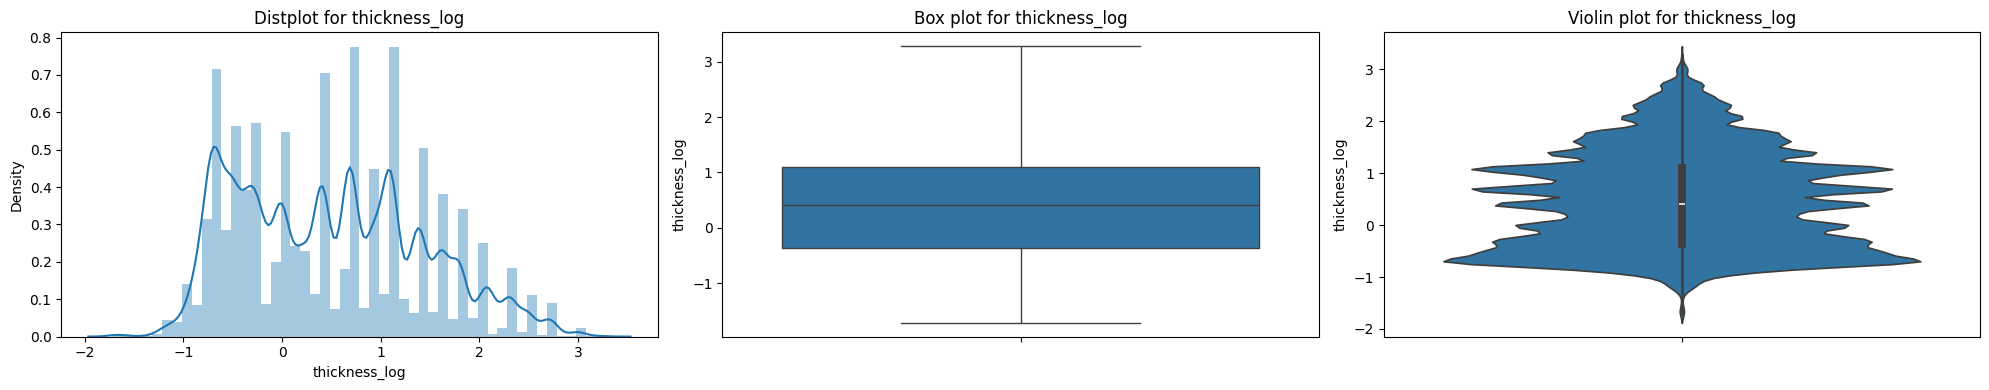

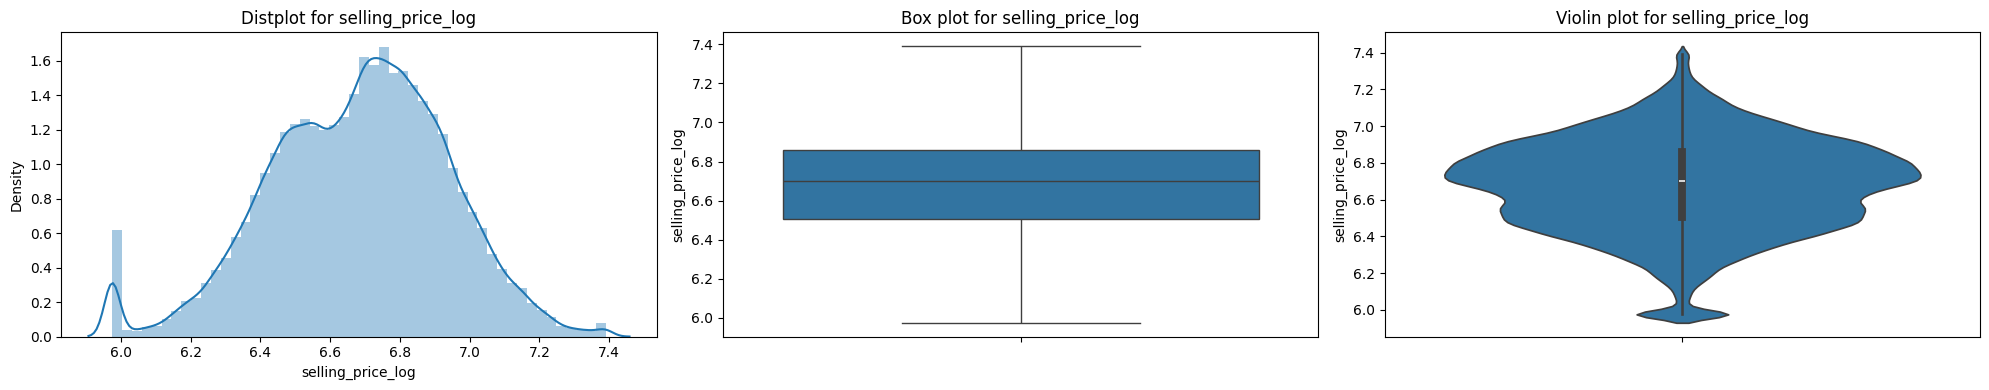

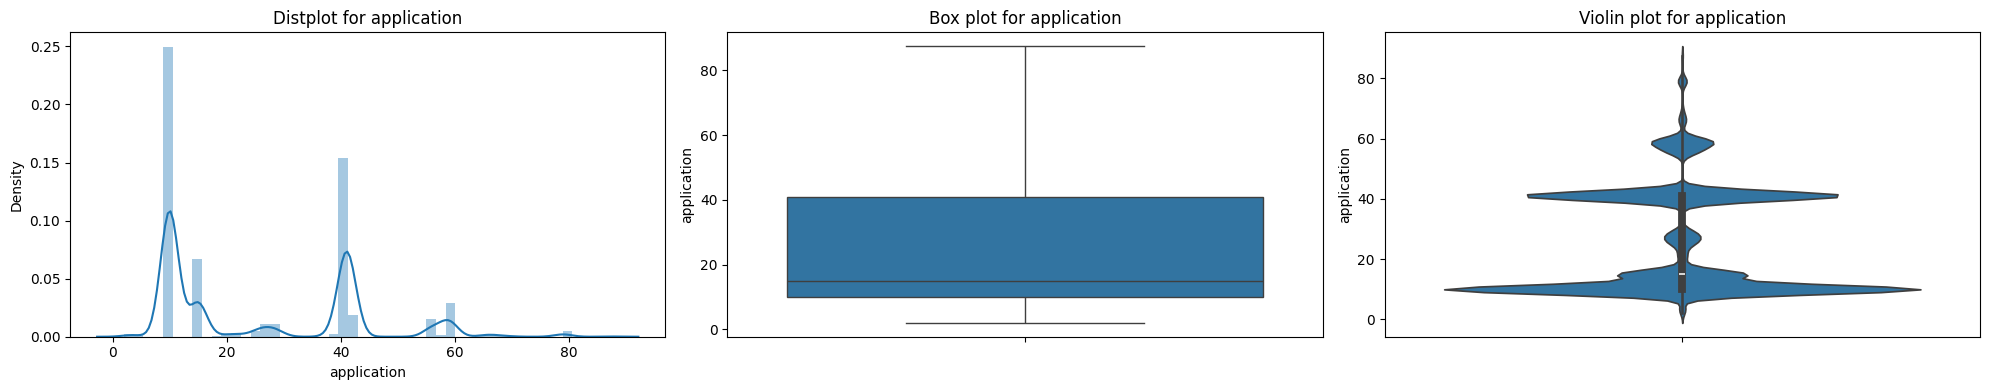

In [31]:
for i in outlier_columns:
  skewplot(df2,i)


<Axes: >

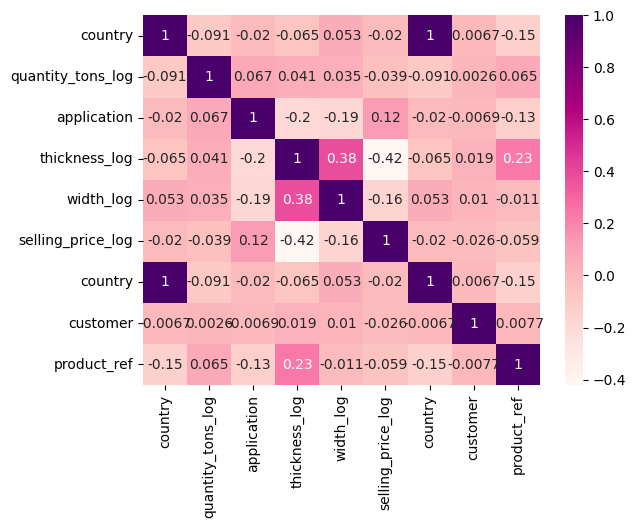

In [32]:
x=df2[['country','quantity_tons_log','application','thickness_log','width_log','selling_price_log','country','customer','product_ref']].corr()
sns.heatmap(x, annot=True, cmap="RdPu")

## ML Regression model which predicts continuous variable ‘Selling_Price’.
## ML Classification model which predicts Status: WON or LOST.
## DECISION TREE REGRESSOR

In [33]:
""" 1 Encode categorical features
2 Test and Train split
3 Define Hyperparameters for GridSearchCV
4 Train the DecisionTreeRegressor with best parameters
5 Evalution metrics
6 Predict the selling price for new values
7 Save the DecisionTreeRegressor model """

' 1 Encode categorical features\n2 Test and Train split\n3 Define Hyperparameters for GridSearchCV\n4 Train the DecisionTreeRegressor with best parameters\n5 Evalution metrics\n6 Predict the selling price for new values\n7 Save the DecisionTreeRegressor model '

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder,OrdinalEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

In [35]:
X=df2[['quantity_tons_log','status','item type','application','thickness_log','width_log','country','customer','product_ref']]
y=df2['selling_price_log']

In [36]:
# encoding categorical variables
it = OneHotEncoder(handle_unknown='ignore')
it.fit(X[['item type']])
X_it = it.fit_transform(X[['item type']]).toarray()
s = OneHotEncoder(handle_unknown='ignore')
s.fit(X[['status']])
X_s = s.fit_transform(X[['status']]).toarray()

In [37]:
# independent features after encoding
X = np.concatenate((X[['quantity_tons_log', 'application', 'thickness_log', 'width_log','country','customer','product_ref']].values, X_it, X_s), axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [38]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Initialize the DecisionTreeRegressor with a fixed random state
dtr = DecisionTreeRegressor(random_state=42)

# Define the hyperparameters to search
param_grid = {'max_depth': [2, 5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['auto', 'sqrt', 'log10']}

# Initialize GridSearchCV with a fixed random state
grid_search = GridSearchCV(estimator=dtr, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Output the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Retrieve the best estimator
my1_model = grid_search.best_estimator_

# Predict the target for the test set
y_pred = my1_model.predict(X_test)

# Calculate and print evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean squared error:', mse)
print('R-squared:', r2)

Best hyperparameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10}
Mean squared error: 0.025730051993277374
R-squared: 0.6069218514025787


In [39]:
# 'quantity tons_log', 'application', 'thickness_log', 'width','country','customer','product_ref']]

In [40]:
sample = np.array([[np.log(54.151139), 10.0, np.log(2.0), 1500, 28.0,3015630800,1670798778,'W','Won']])
sample_it = it.transform(sample[:, [7]]).toarray()
sample_s = s.transform(sample[:, [8]]).toarray()
sample = np.concatenate((sample[:, [0,1,2, 3, 4, 5, 6,]], sample_it, sample_s), axis=1)
sample1 = scaler.transform(sample)
pred = my1_model.predict(sample1)
print('Predicted selling price:', np.exp(pred))

Predicted selling price: [559.11569904]


In [41]:
df2.head(2)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,quantity_tons_log,width_log,thickness_log,selling_price_log
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.0,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.0,3.991779,7.313220,0.693147,6.749931
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.8,1210.0,unknown,1668701718,2021-04-01,1047.0,6.643822,7.098376,-0.223144,6.953684


In [42]:
dff = df2[df2['status'].isin(['Won', 'Lost'])]
len(dff)

150449

In [43]:
dff

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,quantity_tons_log,width_log,thickness_log,selling_price_log
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00,3.991779,7.313220,0.693147,6.749931
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,unknown,1668701718,2021-04-01,1047.00,6.643822,7.098376,-0.223144,6.953684
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33,5.956169,6.858565,-0.967584,6.468211
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00,5.310301,7.183112,0.832909,6.643790
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00,6.666354,7.600902,1.386294,6.357842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,2020-07-02,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,unknown,164141591,2020-07-01,591.00,4.629691,7.106606,-0.040822,6.381816
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,2020-07-02,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,unknown,164141591,2020-07-01,589.00,5.337954,7.313220,-0.051293,6.378426
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,2020-07-02,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,unknown,164141591,2020-07-01,619.00,1.443523,7.130899,-0.342490,6.428105
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,2020-07-02,30.365022,30200854.0,25.0,Won,W,41.0,0.85,1250.0,unknown,164141591,2020-07-01,601.00,3.413291,7.130899,-0.162519,6.398595


In [44]:
   # 577.7

sample = np.array([[np.log(785.526262	), 10.0, np.log(1.386294),2000.0, 28.0,30211560.0,640665,'W','Won']])
sample_it = it.transform(sample[:, [7]]).toarray()
sample_s = s.transform(sample[:, [8]]).toarray()
sample = np.concatenate((sample[:, [0,1,2, 3, 4, 5, 6,]], sample_it, sample_s), axis=1)
sample1 = scaler.transform(sample)
pred = my1_model.predict(sample1)
print('Predicted selling price:', np.exp(pred))

Predicted selling price: [755.7918916]


In [45]:
# Saving the model


import pickle
with open('regmodel.pkl', 'wb') as file:
    pickle.dump(my1_model, file)
with open('regscaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('regitype.pkl', 'wb') as f:
    pickle.dump(it, f)
with open('regstatus.pkl', 'wb') as f:
    pickle.dump(s, f)

In [46]:
len(dff)

150449

### DECISION TREE CLASSIFIER

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelBinarizer

Y = dff['status']
X= dff[['quantity_tons_log','selling_price_log','item type','application','thickness_log','width_log','country','customer','product_ref']]


# encoding categorical variables
it2 = OneHotEncoder(handle_unknown='ignore')
it2.fit(X[['item type']])
X_i2 = it2.fit_transform(X[['item type']]).toarray()
be = LabelBinarizer()
be.fit(Y)
y = be.fit_transform(Y)


# independent features after encoding
X = np.concatenate((X[['quantity_tons_log', 'selling_price_log','application', 'thickness_log', 'width_log','country','customer','product_ref']].values, X_i2), axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# decision tree classifier
cls = DecisionTreeClassifier()
cls.fit(X_train, y_train)
y_pred = cls.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")

Accuracy: 0.9126620139581256
Confusion Matrix:
[[ 5625  1311]
 [ 1317 21837]]


Confusion Matrix:
[[ 5625  1311]
 [ 1317 21837]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      6936
           1       0.94      0.94      0.94     23154

    accuracy                           0.91     30090
   macro avg       0.88      0.88      0.88     30090
weighted avg       0.91      0.91      0.91     30090



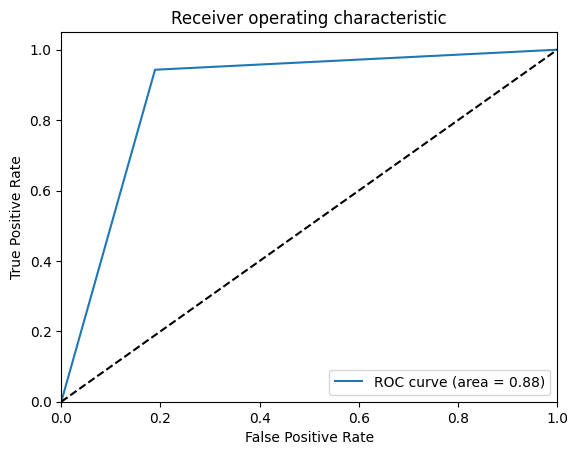

In [48]:
# Evalution Metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
# ROC curve and AUC
false, true, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false, true)
plt.plot(false, true, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [49]:
# Predict the status for a new sample
# 'quantity tons_log', 'selling_price_log','application', 'thickness_log', 'width','country','customer','product_ref']].values, X_ohe
#new_sample = np.array([[np.log(700), np.log(956), 10, np.log(2),1500,28.0,30202938,1670798778,'W']])
sample = np.array([[np.log( 59.99512),np.log(1119.0), 10.0, np.log( 1.25),1500.0, 27.0, 30217607.0,1668701718,'S']])
sample_it2 = it2.transform(sample[:, [8]]).toarray()
sample = np.concatenate((sample[:, [0,1,2, 3, 4, 5, 6,7]], sample_it2), axis=1)
sample = scaler.transform(sample)
pred = cls.predict(sample)
if pred==1:
    print('The status is: Won')
else:
    print('The status is: Lost')

The status is: Lost


In [50]:
print(dff.loc[2814])

id                   177E7353-D8CF-4522-BBBC-1F431F13E482
item_date                                      2021-03-29
quantity tons                                    59.99512
customer                                       30217607.0
country                                              27.0
status                                               Lost
item type                                               S
application                                          10.0
thickness                                            1.25
width                                              1500.0
material_ref                                      unknown
product_ref                                    1668701718
delivery date                                  2021-08-01
selling_price                                      1119.0
quantity_tons_log                                4.094263
width_log                                         7.31322
thickness_log                                    0.223144
selling_price_

In [51]:
# Saving the model
import pickle
with open('clsmodel.pkl', 'wb') as file:
    pickle.dump(cls, file)
with open('clsscaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('itypecls.pkl', 'wb') as f:
    pickle.dump(it2, f)